In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('fifa-outfield-player-stats-2.csv')
data = raw_data.copy()

### checking ols assumptions

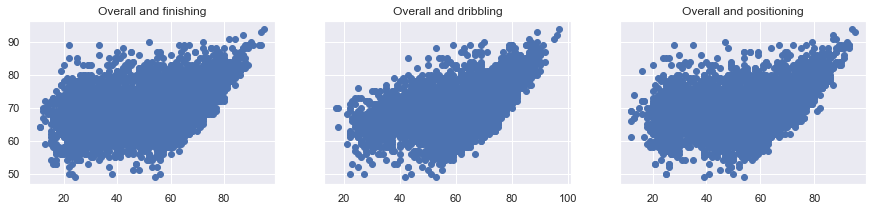

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['attacking_finishing'],data['overall'])
ax1.set_title('Overall and finishing')
ax2.scatter(data['skill_dribbling'],data['overall'])
ax2.set_title('Overall and dribbling')
ax3.scatter(data['mentality_positioning'],data['overall'])
ax3.set_title('Overall and positioning')

plt.show()

In [4]:
log_overall = np.log(data['overall'])
data['log_overall'] = log_overall
data

,midfielder,defender,overall,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,log_overall
0,0,0,94,4,4,88,95,70,92,88,...,48,40,94,94,75,96,33,37,26,4.543295
1,0,0,93,4,5,84,94,89,83,87,...,63,29,95,82,85,95,28,32,24,4.532599
2,1,0,92,5,5,87,87,62,87,87,...,51,36,87,90,90,94,27,26,29,4.521789
3,0,0,91,4,4,81,84,61,89,83,...,54,41,87,89,88,91,34,27,22,4.510860
4,1,0,91,5,4,93,82,55,92,82,...,76,61,88,94,79,91,68,58,51,4.510860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,1,0,50,2,2,42,38,42,60,38,...,40,24,41,53,48,55,52,41,41,3.912023
6594,0,1,50,3,2,20,22,42,25,21,...,48,50,25,31,31,36,48,52,57,3.912023
6595,0,1,50,2,2,27,23,43,32,29,...,46,49,25,34,32,40,47,54,53,3.912023
6596,0,1,49,2,2,33,24,43,25,23,...,54,45,39,32,35,37,46,50,55,3.891820


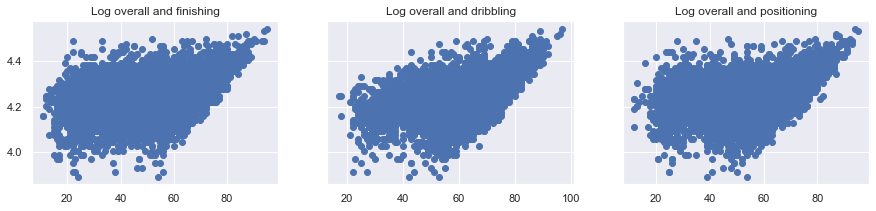

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['attacking_finishing'],data['log_overall'])
ax1.set_title('Log overall and finishing')
ax2.scatter(data['skill_dribbling'],data['log_overall'])
ax2.set_title('Log overall and dribbling')
ax3.scatter(data['mentality_positioning'],data['log_overall'])
ax3.set_title('Log overall and positioning')

plt.show()

In [6]:
data = data.drop(['overall'], axis=1)

#### multicollinearity

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data.drop(['log_overall'], axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,6.132842,midfielder
1,10.432207,defender
2,25.043080,weak_foot
3,43.880637,skill_moves
4,63.498116,attacking_crossing
5,80.048055,attacking_finishing
6,75.741517,attacking_heading_accuracy
7,364.502539,attacking_short_passing
8,49.232785,attacking_volleys
9,209.986141,skill_dribbling


### linear regression model with stats models

In [8]:
data.columns.values

array(['midfielder', 'defender', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'log_overall'], dtype=object)

In [9]:
y = data['log_overall']
x1 = data[['midfielder', 'defender', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']]

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_overall   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:45:06   Log-Likelihood:                 13416.
No. Observations:                6598   AIC:                        -2.676e+04
Df Residuals:                    6564   BIC:                        -2.653e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.4266      0.007    521.046      0.000       3.414       3.439
midfielder                    -0.0038      0.002     -2.471      0.013      -0.007      -0.001
defender                       0.0145      0.002      7.060      0.000       0.010       0.019
weak_foot                      0.0013      0.001      1.976      0.048     9.7e-06       0.003
skill_moves                    0.0151      0.001     15.831      0.000       0.013       0.017
attacking_crossing            -0.0002   5.32e-05     -3.228      0.001      -0.000   -6.74e-05
attacking_finishing            0.0005   6.45e-05      7.191      0.000       0.000       0.001
attacking_heading_accuracy     0.0010   5.66e-05     17.515      0.000       0.001       0.001
attacking_short_passing        0.0023      0.000     20.086      0.000       0.002       0.003
attacking_volleys          -8.172e-05   5.38e-05     -1.519      0.129      -0.000    2.38e-05
skill_dribbling               -0.0002   8.85e-05     -2.724      0.006      -0.000   -6.76e-05
skill_curve                -9.881e-05   5.36e-05     -1.844      0.065      -0.000    6.21e-06
skill_fk_accuracy           9.567e-05   4.63e-05      2.067      0.039    4.92e-06       0.000
skill_long_passing             0.0002   7.26e-05      2.865      0.004    6.57e-05       0.000
skill_ball_control             0.0020      0.000     16.504      0.000       0.002       0.002
movement_acceleration          0.0005   8.14e-05      6.432      0.000       0.000       0.001
movement_sprint_speed          0.0004   7.28e-05      5.414      0.000       0.000       0.001
movement_agility              -0.0002   6.53e-05     -2.318      0.020      -0.000   -2.33e-05
movement_reactions             0.0042    8.9e-05     47.001      0.000       0.004       0.004
movement_balance              -0.0002   5.52e-05     -3.173      0.002      -0.000   -6.69e-05
power_shot_power               0.0004   5.94e-05      7.193      0.000       0.000       0.001
power_jumping               5.729e-05   3.91e-05      1.466      0.143   -1.93e-05       0.000
power_stamina               7.691e-05   4.89e-05      1.571      0.116    -1.9e-05       0.000
power_strength                 0.0004   5.65e-05      7.455      0.000       0.000       0.001
power_long_shots              -0.0003   6.09e-05     -5.348      0.000      -0.000      -0.000
mentality_aggression           0.0001   4.37e-05      2.357      0.018    1.73e-05       0.000
mentality_interceptions       -0.0002   6.58e-05     -2.815      0.005      -0.000   -5.62e-05
mentality_positioning         -0.0007   6.21e-05    -10.903      0.000      -0.001      -0.001
mentality_vision              -0.0005   6.92e-05     -6.738      0.000      -0.001      -0.000
mentality_penalties         8.994e-05   5.2

### linear regression model with sklearn

In [11]:
targets = data['log_overall']
inputs = data.drop(['log_overall'],axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [13]:
inputs_scaled = scaler.transform(inputs)

#### train test split

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=19)

In [15]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
y_hat = reg.predict(x_train)

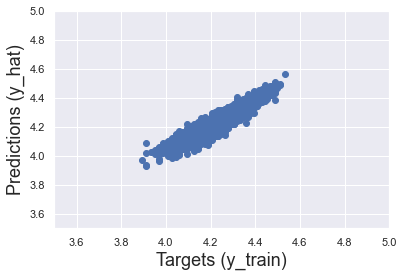

In [17]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(3.5,5)
plt.ylim(3.5,5)
plt.show()

/Users/harriselliman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

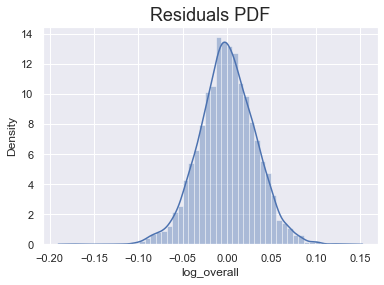

In [18]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [19]:
reg.score(x_train, y_train)

0.8658402478157007

#### weights and biases

In [20]:
reg.intercept_

4.234770131628819

In [21]:
reg.coef_

array([-0.00178427,  0.00773516,  0.00045802,  0.00985171, -0.00278473,
        0.00734231,  0.01155615,  0.01997986, -0.00056003, -0.00357376,
       -0.0011721 ,  0.00171172,  0.00235572,  0.01931454,  0.00688842,
        0.00469327, -0.00177657,  0.0330883 , -0.0024382 ,  0.00587692,
        0.0007182 ,  0.00152013,  0.00482987, -0.00687181,  0.00101987,
       -0.00368208, -0.00989608, -0.00535521,  0.00157005,  0.01486673,
        0.00571656,  0.0006315 , -0.00227361])

In [22]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,midfielder,-0.001784
1,defender,0.007735
2,weak_foot,0.000458
3,skill_moves,0.009852
4,attacking_crossing,-0.002785
5,attacking_finishing,0.007342
6,attacking_heading_accuracy,0.011556
7,attacking_short_passing,0.019980
8,attacking_volleys,-0.000560
9,skill_dribbling,-0.003574


### testing

In [23]:
y_hat_test = reg.predict(x_test)

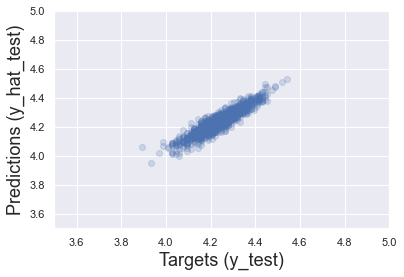

In [24]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(3.5,5)
plt.ylim(3.5,5)
plt.show()

In [25]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,76.150175
1,64.351532
2,80.016378
3,78.510990
4,81.720580


In [26]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    4.356709
1    4.158883
2    4.343805
3    4.356709
4    4.442651
Name: log_overall, dtype: float64

In [27]:
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,76.150175,78.0,1.849825,2.371570
1,64.351532,64.0,-0.351532,0.549269
2,80.016378,77.0,-3.016378,3.917375
3,78.510990,78.0,-0.510990,0.655116
4,81.720580,85.0,3.279420,3.858141
...,...,...,...,...
1315,63.279787,64.0,0.720213,1.125333
1316,64.985667,63.0,-1.985667,3.151852
1317,71.811526,72.0,0.188474,0.261769
1318,73.334739,73.0,-0.334739,0.458546


In [28]:
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
764,70.00,70.00,-0.00,0.00
613,68.00,68.00,-0.00,0.01
242,82.99,83.00,0.01,0.01
545,81.99,82.00,0.01,0.02
444,65.01,65.00,-0.01,0.02
700,71.98,72.00,0.02,0.03
533,74.02,74.00,-0.02,0.03
873,81.02,81.00,-0.02,0.03
194,70.02,70.00,-0.02,0.03
860,69.98,70.00,0.02,0.03
